In [65]:
#import data from files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
calculated = pd.read_csv('maxLatenciesCBSMaxLatency.csv')
filtered_calculatedStages = calculated[calculated[' Note'].str.contains('Stages=5queue')]
filtered_calculated = {
    "PFaster": dict(), 
    "PFasterV2": dict(),
    "P100": dict(), 
    "BA": dict(), 
    "Q": dict(), 
    }
for row in filtered_calculatedStages.iterrows():
    inputCount = int(row[1][' Note'].split("Inputs=")[1].split("-")[0])
    filtered_calculated["PFasterV2"][inputCount] = row[1][" PFasterV2"]
    filtered_calculated["PFaster"][inputCount] = row[1][" PFaster"]
    filtered_calculated["P100"][inputCount] = row[1][" P100"]
    filtered_calculated["BA"][inputCount] = row[1][" BA"]
    filtered_calculated["Q"][inputCount] = row[1][" Q"]
    
filtered_calculated


{'PFaster': {1: 0.00024804,
  2: 0.00024804,
  3: 0.00024804,
  4: 0.00024804,
  5: 0.00024804,
  6: 0.00024804,
  7: 0.00024804,
  8: 0.00024804,
  9: 0.00024804,
  10: 0.00024804,
  11: 0.00024804,
  12: 0.00024804,
  13: 0.00024804},
 'PFasterV2': {1: 0.00062108,
  2: 0.0004959743364327,
  3: 0.0004543428909551,
  4: 0.0004334215046491,
  5: 0.0004209532037193,
  6: 0.0004127114454775,
  7: 0.0004067942857142,
  8: 0.0004021450887573,
  9: 0.0003987638546069,
  10: 0.0003960166018596,
  11: 0.0003936920033812,
  12: 0.0003917900591715,
  13: 0.0003903107692307},
 'P100': {1: 0.00021768,
  2: 0.00024136,
  3: 0.00025976,
  4: 0.00027096,
  5: 0.00027828,
  6: 0.00028341,
  7: 0.00028721,
  8: 0.0002902,
  9: 0.00029248,
  10: 0.00029436,
  11: 0.00029593,
  12: 0.00029724,
  13: 0.00029832},
 'BA': {1: 0.00021672,
  2: 0.0002319128317836,
  3: 0.0002369685545224,
  4: 0.0002395092476754,
  5: 0.0002410233981403,
  6: 0.0002420242772612,
  7: 0.0002427428571428,
  8: 0.000243307455621

In [67]:
variableSlopeSim = pd.read_json('variableSlopeQueueDelay.json')
filtered_variableSlopeSim = dict()
#iterate over studies
for study in variableSlopeSim:
    # filter for itervars "S" = 5
    if(variableSlopeSim[study]["itervars"]["S"] == "5"):
        # get inputCount
        inputCount = int(variableSlopeSim[study]["itervars"]["IL"])
        for vector in variableSlopeSim[study]["vectors"]:
            if vector["name"] == "delay:vector":
                filtered_variableSlopeSim[inputCount] = np.max(vector["value"])
# sort according to inputCount
filtered_variableSlopeSim = dict(sorted(filtered_variableSlopeSim.items()))
filtered_variableSlopeSim

{1: 0.000123059913,
 2: 0.000290699116,
 3: 0.000325866607,
 4: 0.00033747481,
 5: 0.000347443936,
 6: 0.000322710307,
 7: 0.000330419672,
 8: 0.00033855824699999997,
 9: 0.000368201984,
 10: 0.00037727,
 11: 0.000356234633,
 12: 0.000342051477,
 13: 0.000352949236}

In [68]:

fixedSlopeSim = pd.read_json('fixedSlopeQueueDelay.json')
filtered_fixedSlopeSim = dict()
#iterate over studies
for study in fixedSlopeSim:
    # filter for itervars "S" = 5
    if(fixedSlopeSim[study]["itervars"]["S"] == "5"):
        # get inputCount
        inputCount = int(fixedSlopeSim[study]["itervars"]["IL"])
        for vector in fixedSlopeSim[study]["vectors"]:
            if vector["name"] == "delay:vector":
                filtered_fixedSlopeSim[inputCount] = np.max(vector["value"])
filtered_fixedSlopeSim = dict(sorted(filtered_fixedSlopeSim.items()))
filtered_fixedSlopeSim

{1: 0.00012303500000000002,
 2: 0.0007792150000000001,
 3: 0.0007943150000000001,
 4: 0.0008002150000000001,
 5: 0.0008057950000000001,
 6: 0.000808415,
 7: 0.0008094350000000001,
 8: 0.000809895,
 9: 0.0008121150000000001,
 10: 0.000812655,
 11: 0.000810155,
 12: 0.0008089350000000001,
 13: 0.000813315}

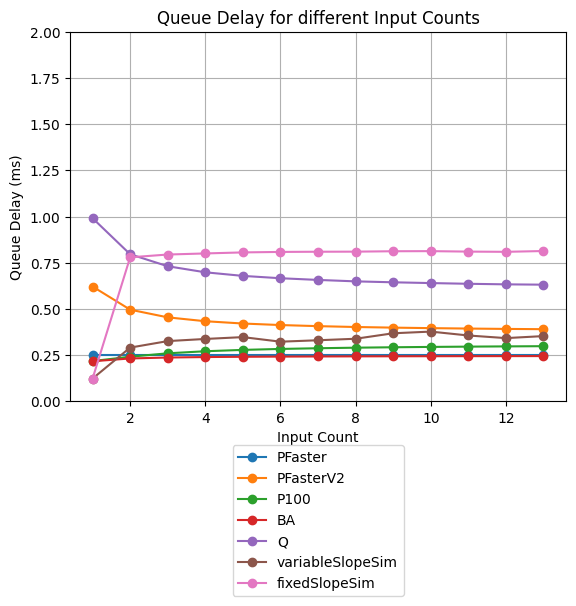

In [69]:
for key in filtered_calculated:
    plt.plot(filtered_calculated[key].keys(), [value * 1000 for value in filtered_calculated[key].values()], 'o-', label=key)
plt.plot(filtered_variableSlopeSim.keys(), [value * 1000 for value in filtered_variableSlopeSim.values()], 'o-', label='variableSlopeSim')
plt.plot(filtered_fixedSlopeSim.keys(), [value * 1000 for value in filtered_fixedSlopeSim.values()], 'o-', label='fixedSlopeSim')
plt.xlabel('Input Count')
plt.ylabel('Queue Delay (ms)')
plt.title('Queue Delay for different Input Counts')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.ylim(0, 2)
plt.grid(True)  # Add this line to show grid lines
